In [1]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
import PIL
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

In [2]:
BATCH_SIZE = 64
IMG_HEIGHT = 180
IMG_WIDTH = 180
VAL_SPLIT = 0.2
SEED = 157
LABELS = 'binary'
DATA_PATH = '/kaggle/input/cat-vs-dogs'
animals = list(os.walk('/kaggle/input/cat-vs-dogs'))

In [3]:
label_names = animals[0][1]
dict_labels = dict(zip(label_names, list(range(len(label_names)))))
print(dict_labels)

{'dog': 0, 'cat': 1}


In [4]:
def dataset(path):
    images = []
    labels = []
    for folder in tqdm(os.listdir(path)):
        value_of_label = dict_labels[folder] 

        for file in (os.listdir(os.path.join(path, folder, folder))):
            path_of_file = os.path.join(os.path.join(path, folder, folder), file)
            # print(path_of_file)
            image = cv2.imread(path_of_file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
            images.append(image)
            labels.append(value_of_label)

    images = np.array(images, dtype = 'float32')/255.0
    labels = np.array(labels)

    return images, labels

images, labels = dataset(DATA_PATH)
images, labels = shuffle(images, labels)
images.shape

100%|██████████| 2/2 [00:38<00:00, 19.36s/it]


(5364, 180, 180, 3)

In [5]:
size = len(images)
point = int(size*(1-VAL_SPLIT))
train_image = images[0:point+1]
train_label = labels[0:point+1]
val_image = images[point+1:size]
val_label = labels[point+1:size]
print(len(train_image) )
print(len(val_image) )

4292
1072


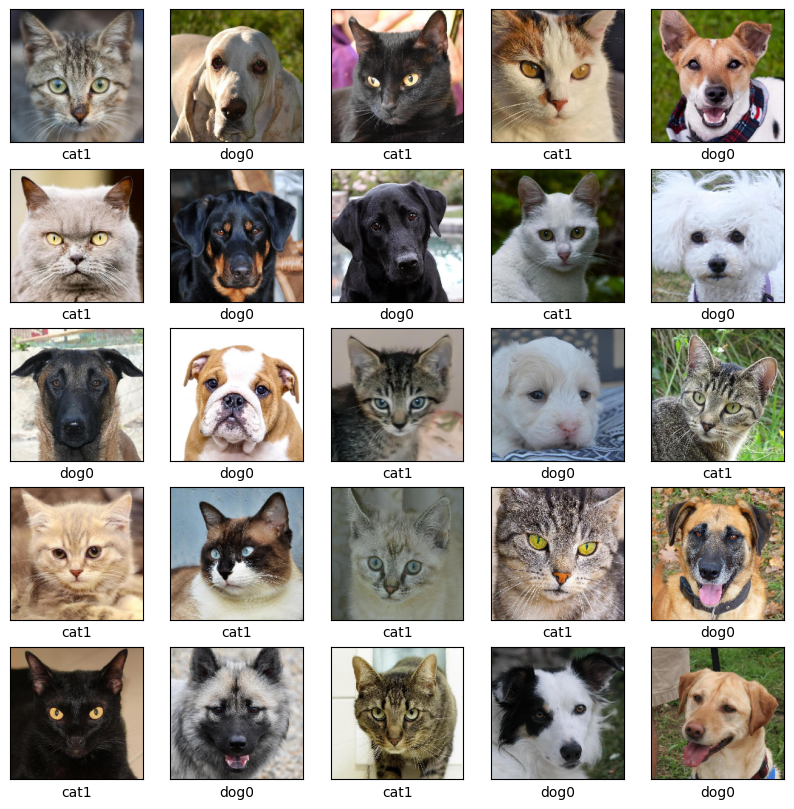

In [6]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    data = images[i]
    plt.xlabel(str(label_names[labels[i]] + str(labels[i])))
    plt.imshow(data);

In [7]:
PetNet=Sequential()
PetNet.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# 1st Conv Block
PetNet.add(Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))       

# # 2nd Conv Block
PetNet.add(Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # 3rd Conv block
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'))
# PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # 4th Conv block
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # 5th Conv block
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'))
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

# # Fully connected layers
PetNet.add(tf.keras.layers.BatchNormalization())
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(Flatten()) 
PetNet.add(Dense(units = 128, activation ='relu'))
PetNet.add(tf.keras.layers.Dropout(0.3))
PetNet.add(Dense(units = 64, activation ='relu'))


PetNet.add(Dense(units = 1, activation ='sigmoid'))
PetNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45, 45, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 17,096,257 (65.22 MB)

 Trainable params: 17,089,345 (65.19 MB)

 Non-trainable params: 6,912 (27.00 KB)

In [8]:
PetNet.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [9]:
history = PetNet.fit(train_image, train_label, epochs=32, validation_data=(val_image, val_label))

Epoch 1/32


I0000 00:00:1733297498.493487      76 service.cc:145] XLA service 0x7d756c014a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733297498.493546      76 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733297498.493550      76 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733297535.960523      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


134/135 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.5910 - loss: 1.0643

2024-12-04 07:33:05.023786: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[4,64,180,180]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,64,180,180]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-04 07:33:05.470476: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.446827808s
Trying algorithm eng4{k11=1} for conv (f32[4,64,180,180]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,64,180,180]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn

135/135 ━━━━━━━━━━━━━━━━━━━━ 113s 520ms/step - accuracy: 0.5911 - loss: 1.0627 - val_accuracy: 0.5121 - val_loss: 7.5468
Epoch 2/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 45s 333ms/step - accuracy: 0.6661 - loss: 0.6921 - val_accuracy: 0.6483 - val_loss: 1.2531
Epoch 3/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 324ms/step - accuracy: 0.7626 - loss: 0.5307 - val_accuracy: 0.6269 - val_loss: 0.7919
Epoch 4/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 45s 330ms/step - accuracy: 0.8402 - loss: 0.3570 - val_accuracy: 0.7882 - val_loss: 0.4489
Epoch 5/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.8874 - loss: 0.2701 - val_accuracy: 0.5448 - val_loss: 1.1806
Epoch 6/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 328ms/step - accuracy: 0.9176 - loss: 0.2103 - val_accuracy: 0.5522 - val_loss: 1.0907
Epoch 7/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 325ms/step - accuracy: 0.9390 - loss: 0.1677 - val_accuracy: 0.7257 - val_loss: 0.9661
Epoch 8/32
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.9453 - loss: 0.1454 - va

In [10]:
PetNet.save('PetNet.h5')